# Primary Clustering Algorithms:
Clustering algorithms can be grouped as agglomerative clustering, distance-based clustering, and density-based clustering. We will briefly cover some of these concepts.

## Practical Example  - Hierarchical Clustering

In [5]:
import pandas as pd # imports the pandas library

df = pd.read_csv("telco_churn_processed.csv") # reads the dataset

In [6]:
df.tail() # prints the last five records

,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineBackup_No internet service,tenure_standardized,gender_Male,StreamingMovies_Yes,OnlineSecurity_No internet service,Partner_Yes,...,PhoneService_Yes,TechSupport_No internet service,OnlineBackup_Yes,TotalCharges_standardized,TechSupport_Yes,MonthlyCharges_standardized,PaymentMethod_Mailed check,MultipleLines_No phone service,DeviceProtection_Yes,PaperlessBilling_Yes
10343,0.0,0.0,0.0,0,0.0,1.0,0,0.647768,0.0,1.000000,...,1.0,0,0.0,0,0.783472,0,0.0,-0.938379,1.000000,-1.236724
10344,0.0,0.0,0.0,0,0.0,1.0,0,0.755712,0.0,1.000000,...,1.0,0,0.0,0,1.000000,0,0.0,-0.404602,1.000000,-0.639169
10345,0.0,0.0,0.0,0,0.0,1.0,0,0.321304,0.0,1.000000,...,1.0,0,0.0,0,0.000000,0,0.0,-0.400855,0.000000,-0.587996
10346,0.0,0.0,0.0,0,0.0,1.0,0,0.761485,0.0,0.622794,...,0.0,0,1.0,0,0.000000,0,1.0,-0.538455,0.622794,-0.835599
10347,0.0,0.0,0.0,0,0.0,0.0,0,-0.497855,0.0,0.000000,...,0.0,0,0.0,0,0.000000,0,0.0,-0.955384,0.000000,-1.200581


* Remember data needs to be preprocessed
* Creating Dummies
* Normalizing Data
* Replacing Missing values
* Etc.

In [7]:
## Fit Hierarchical Clustering

from matplotlib import pyplot as plt # import the matplotlib library

from scipy.cluster.hierarchy import dendrogram, linkage 
# import the linkage clustering and dendogram methods

import numpy as np

Z = linkage(df, 'single') # cluster the dataset using single linkage method

print(Z) # this gives contains 4 columns
# Z cluster linkage array (contains the hierarchical clustering information)

# We can see that each row of the resulting array has the format 
# [idx1, idx2, dist, sample_count].
# Z[0] = 333 is basically the first cluster

[[3.04400000e+03 5.48000000e+03 0.00000000e+00 2.00000000e+00]
 [6.46000000e+02 9.64000000e+02 0.00000000e+00 2.00000000e+00]
 [1.24300000e+03 6.51800000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [1.03000000e+02 2.06910000e+04 2.00480156e+00 8.60600000e+03]
 [6.67000000e+03 2.06920000e+04 2.01547397e+00 8.60700000e+03]
 [1.98410000e+04 2.06930000e+04 2.74974840e+00 1.03480000e+04]]


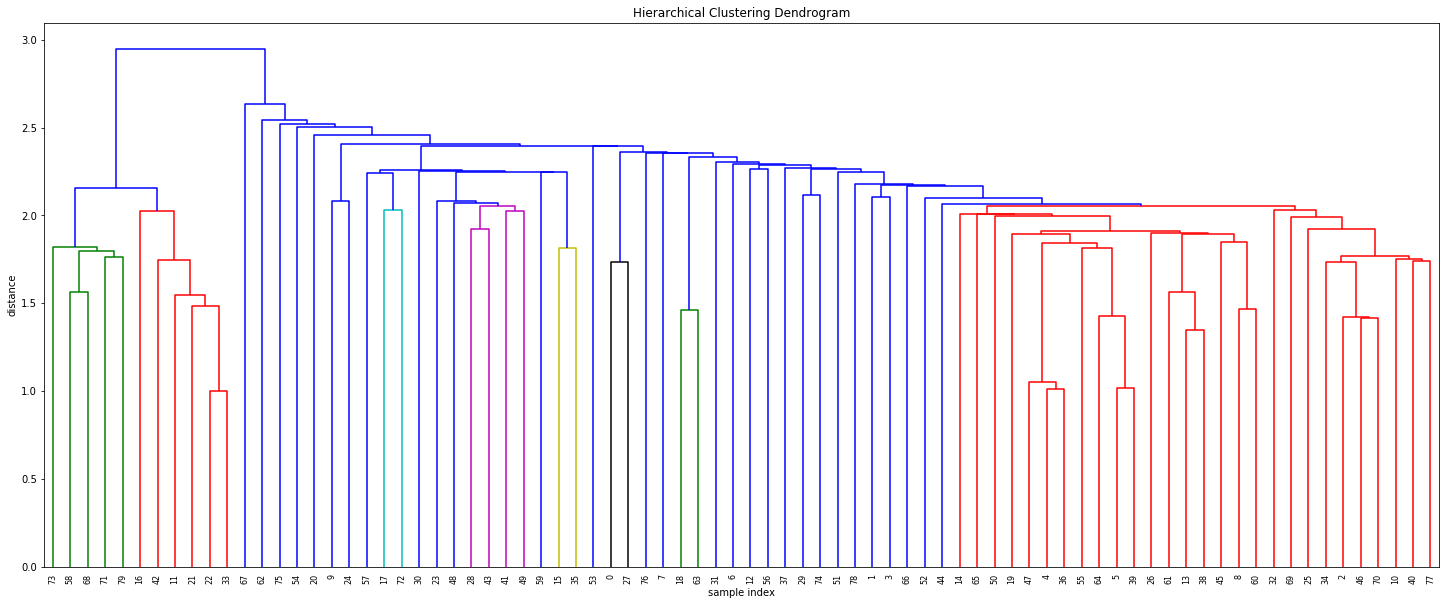

In [8]:
plt.figure(figsize=(25, 10)) # determine the figure size

plt.title('Hierarchical Clustering Dendrogram') # named the plot

plt.xlabel('sample index') # name the x axis

plt.ylabel('distance') # names the y axis

Z_small = linkage(df[:80], 'single')

# plots a dendrogram
dendrogram(
    Z_small,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show() # shows the plot

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

k = 2 # sets the maximum number of clusters

fcluster(Z, k, criterion='maxclust') # runs the clustering based on maximum cluster

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [11]:
df['clusters'] = fcluster(Z, k, criterion='maxclust') # adds a column to the df that shows
# the cluster of each entries
df['clusters'].value_counts()

2    8607
1    1741
Name: clusters, dtype: int64

#######################################################################################

## Practical Example K-Means Clustering

* Remember data needs to be preprocessed
* Creating Dummies
* Normalizing Data
* Replacing Missing values
* Etc.

In [12]:
## Fit K-means

from sklearn.cluster import KMeans # import KMeans

model = KMeans(n_clusters = 2) # Creates a KMeans instance where K = 3

model.fit(df) # fits the KMeans using the normalized data

labels = model.labels_ # extracts the classes

In [13]:
labels + 1 # (classes start from 0 so adding one makes it easier to interpret)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [14]:
df['2-means'] = labels+1 # adds a column showing the class membership values 
# to the existing dataframe
df['2-means'].value_counts()# prints the last five records

2    8607
1    1741
Name: 2-means, dtype: int64

In [15]:
df.groupby('2-means').mean() 
# computes the mean of columns by the levels of the 3-means variable
# use this one to evaluate the result of your clustering
# how clusters differ among different attributes
# After each clustering algorithm, you need to compare the clusters so that you can profile 
# and interpret the  results. 
# To do so, it is important to compare the median or mean of the variables across clusters

,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineBackup_No internet service,tenure_standardized,gender_Male,StreamingMovies_Yes,OnlineSecurity_No internet service,Partner_Yes,...,TechSupport_No internet service,OnlineBackup_Yes,TotalCharges_standardized,TechSupport_Yes,MonthlyCharges_standardized,PaymentMethod_Mailed check,MultipleLines_No phone service,DeviceProtection_Yes,PaperlessBilling_Yes,clusters
2-means,,,,,,,,,,,,,,,,,,,,,
1,0.216982,0.369435,0.391755,1,0.00000,0.000000,1,-1.454733,0.000000,0.206027,...,1,0.00000,1,0.000000,1,0.000000,-0.740941,0.505753,-0.192415,1
2,0.155536,0.130320,0.224555,0,0.38675,0.629239,0,0.413394,0.114317,0.481812,...,0,0.48367,0,0.481659,0,0.292121,0.015465,0.507037,-0.196530,2


Text(0.5, 1.0, 'Elbow curve')

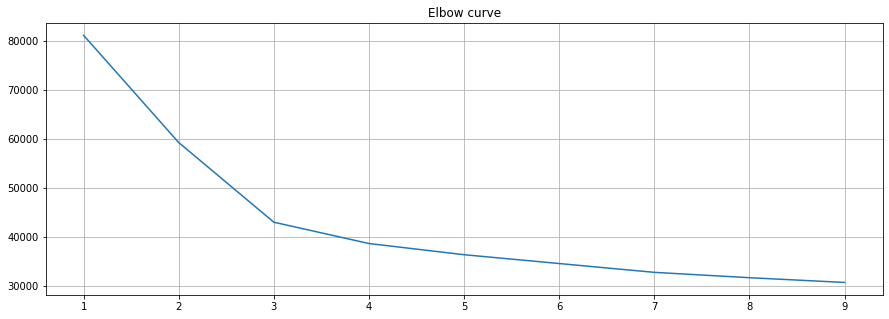

In [16]:
X = df.copy() # copy the normalized_df and save it to a variable named X

distorsions = [] # create an empty list named distorsions

for k in range(1, 10): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(1, 10), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve') # title the plot

# This curve helps us determine the number of clusters (somehow optimally)

In [17]:
## Fit K-means
model = KMeans(n_clusters = 3) # appears that 7 is the optimal number of classes

model.fit(df) # fits the model

labels = model.labels_ #extracts the class labels

In [18]:
df['optimum_clusters'] = labels+1 # for easy interpretation, adding 1 to class labels
df['optimum_clusters'].value_counts()

2    5512
1    3095
3    1741
Name: optimum_clusters, dtype: int64

In [19]:
df.groupby('optimum_clusters').mean()

# computes the mean of columns by the levels of the 3-means variable
# use this one to evaluate the result of your clustering
# how clusters differ among different attributes
# After each clustering algorithm, you need to compare the clusters so that you can profile 
# and interpret the  results. 
# To do so, it is important to compare the median or mean of the variables across clusters

,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineBackup_No internet service,tenure_standardized,gender_Male,StreamingMovies_Yes,OnlineSecurity_No internet service,Partner_Yes,...,OnlineBackup_Yes,TotalCharges_standardized,TechSupport_Yes,MonthlyCharges_standardized,PaymentMethod_Mailed check,MultipleLines_No phone service,DeviceProtection_Yes,PaperlessBilling_Yes,clusters,2-means
optimum_clusters,,,,,,,,,,,,,,,,,,,,,
1,0.307157,0.334654,0.315229,0,0.657936,0.683864,0,0.849714,0.067528,0.714906,...,0.732966,0,0.733388,0,0.497137,1.175873,0.517623,0.919182,2,2
2,0.070401,0.015585,0.173641,0,0.234478,0.598567,0,0.168399,0.140589,0.350930,...,0.343690,0,0.340312,0,0.177005,-0.636107,0.501092,-0.823005,2,2
3,0.216982,0.369435,0.391755,1,0.000000,0.000000,1,-1.454733,0.000000,0.206027,...,0.000000,1,0.000000,1,0.000000,-0.740941,0.505753,-0.192415,1,1
